### info for outlier handling
- https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings  # hem uyarı satırlarını hem de çıktı sonuçlarını bir arada görebilmenizi sağlar.
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

from scipy.stats.mstats import winsorize

# pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_colwidth', 500)
# pd.set_option('display.max_info_columns', 500)
# pd.set_option('display.max_info_rows', 2000)
# pd.set_option('display.expand_frame_repr', True)
# pd.set_option('display.width', 2000)

sns.set_style("whitegrid")
# baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
# eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 11 }
pd.options.display.float_format = '{:.2f}'.format

In [94]:
df = pd.read_json("scout_6.json")

pd.set_option('display.max_columns', None)
df.head(1)

,make_model,body_type,price,vat,km,prev_owner,hp_kW,type,gear_type,displacement_cc,fuel,emission_class,gears,registration_year,body_color,paint_type,num_door,num_seat,cylinders,upholstery_type,upholstery_color,co2_emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,cons_comb,cons_city,cons_count
0,Audi A1,Sedans,15770,VAT deductible,56013,2.00,66.00,Used,Automatic,1422.00,Diesel,Euro 6,nan,2016.00,Black,Metallic,5.00,5.00,3.00,Cloth,Black,99.00,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.80,4.30,3.50


In [95]:
df.columns = df.columns.str.lower()

In [96]:
list(df.columns)

['make_model',
 'body_type',
 'price',
 'vat',
 'km',
 'prev_owner',
 'hp_kw',
 'type',
 'gear_type',
 'displacement_cc',
 'fuel',
 'emission_class',
 'gears',
 'registration_year',
 'body_color',
 'paint_type',
 'num_door',
 'num_seat',
 'cylinders',
 'upholstery_type',
 'upholstery_color',
 'co2_emission',
 'cc_air conditioning',
 'cc_air suspension',
 'cc_armrest',
 'cc_automatic climate control',
 'cc_auxiliary heating',
 'cc_cruise control',
 'cc_electric starter',
 'cc_electric tailgate',
 'cc_electrical side mirrors',
 'cc_electrically adjustable seats',
 'cc_electrically heated windshield',
 'cc_heads-up display',
 'cc_heated steering wheel',
 'cc_hill holder',
 'cc_keyless central door lock',
 'cc_leather seats',
 'cc_leather steering wheel',
 'cc_light sensor',
 'cc_lumbar support',
 'cc_massage seats',
 'cc_multi-function steering wheel',
 'cc_navigation system',
 'cc_panorama roof',
 'cc_park distance control',
 'cc_parking assist system camera',
 'cc_parking assist system 

In [97]:
nan_ratio = pd.DataFrame(df.isnull().sum().sort_values()/df.shape[0]*100)
nan_ratio.rename(columns = {0 : "nan_ratio"})

,nan_ratio
make_model,0.00
ss_immobilizer,0.00
ss_head airbag,0.00
ss_fog lights,0.00
ss_emergency system,0.00
...,...
gears,29.60
upholstery_color,31.90
cylinders,35.68
paint_type,36.26


In [98]:
df.head(2)

,make_model,body_type,price,vat,km,prev_owner,hp_kw,type,gear_type,displacement_cc,fuel,emission_class,gears,registration_year,body_color,paint_type,num_door,num_seat,cylinders,upholstery_type,upholstery_color,co2_emission,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,cons_comb,cons_city,cons_count
0,Audi A1,Sedans,15770,VAT deductible,56013,2.00,66.00,Used,Automatic,1422.00,Diesel,Euro 6,nan,2016.00,Black,Metallic,5.00,5.00,3.00,Cloth,Black,99.00,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.80,4.30,3.50
1,Audi A1,Sedans,14500,Price negotiable,80000,nan,141.00,Used,Automatic,1798.00,Benzine,Euro 6,7.00,2017.00,Red,None,3.00,4.00,4.00,Cloth,Grey,129.00,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,5.60,7.10,4.70


### make_model

In [99]:
df.make_model.isnull().sum()

0

In [100]:
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

### body_type

In [101]:
df.body_type.isnull().sum()

60

In [102]:
df.body_type.value_counts(dropna = False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [103]:
# I am goint to define fill_most function inorder fillna according to make_model
def fill_most(data, group_col, col_name):
    for group in list(data[group_col].unique()) :
        grp_inx = list(data[data[group_col] == group][col_name].index)
        data[col_name].iloc[grp_inx] = data[col_name].iloc[grp_inx].fillna(data[data[group_col] == group][col_name].mode()[0])

In [104]:
fill_most(df, "make_model", "body_type")

In [105]:
df.body_type.value_counts(dropna = False)

Sedans           7925
Station wagon    3563
Compact          3155
Van               809
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [106]:
df[df.body_type == "Other"].loc[df.make_model == "Audi A1"]

,make_model,body_type,price,vat,km,prev_owner,hp_kw,type,gear_type,displacement_cc,fuel,emission_class,gears,registration_year,body_color,paint_type,num_door,num_seat,cylinders,upholstery_type,upholstery_color,co2_emission,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,cons_comb,cons_city,cons_count
744,Audi A1,Other,23490,None,22001,nan,140.00,Used,Semi-automatic,nan,Benzine,None,7.00,2017.00,Black,None,5.00,5.00,4.00,None,None,134.00,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,5.80,7.40,4.90
1764,Audi A1,Other,16590,VAT deductible,5300,1.00,60.00,Used,Manual,999.00,Benzine,Euro 6,5.00,2018.00,White,Metallic,5.00,5.00,3.00,Cloth,None,97.00,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4.20,5.00,3.70
1793,Audi A1,Other,16900,VAT deductible,18950,1.00,85.00,Employee's car,Manual,1598.00,Diesel,Euro 6,5.00,2018.00,Black,Metallic,5.00,4.00,4.00,Cloth,Black,99.00,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.80,4.60,3.30
1819,Audi A1,Other,16900,VAT deductible,26980,1.00,85.00,Employee's car,Manual,1598.00,Diesel,Euro 6,5.00,2018.00,White,Metallic,5.00,5.00,4.00,Cloth,Black,99.00,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.80,4.60,3.30
2047,Audi A1,Other,26900,VAT deductible,2000,1.00,85.00,Demonstration,Automatic,999.00,Benzine,None,7.00,2019.00,Grey,Metallic,5.00,5.00,3.00,Cloth,Black,108.00,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,4.80,5.80,4.20
2078,Audi A1,Other,25900,VA

In [107]:
df[df.body_type == "Other"].make_model.unique()

array(['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia',
       'Renault Clio', 'Renault Espace'], dtype=object)

In [108]:
# Other values are converted into NaNs
other_rows = (df.body_type == "Other")
df.loc[other_rows, "body_type"] = df.loc[other_rows, "body_type"].apply(lambda x : np.nan)
# or
# df.body_type[df.body_type == "Other"] = np.nan

In [109]:
df.body_type.value_counts(dropna = False)

Sedans           7925
Station wagon    3563
Compact          3155
Van               809
NaN               290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [110]:
fill_most(df, "make_model", "body_type")

In [111]:
df.body_type.value_counts(dropna = False)

Sedans           8005
Station wagon    3678
Compact          3242
Van               817
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [112]:
df[df.body_type == "Transporter"].make_model.unique()

array(['Opel Corsa', 'Renault Clio', 'Renault Espace'], dtype=object)

<AxesSubplot:>

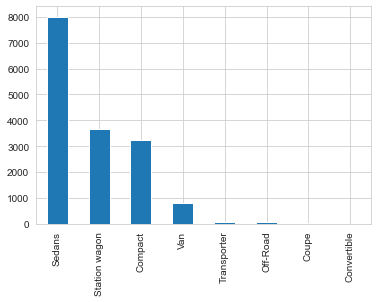

In [113]:
df.body_type.value_counts(dropna = False).plot(kind = "bar")

### cylinders
- We have to make a conclusion if we should drop it. First we will fill missing values than make a decision.

In [114]:
df.cylinders.value_counts(dropna=False)

4.00    8105
nan     5680
3.00    2104
5.00      22
6.00       3
2.00       2
8.00       2
1.00       1
Name: cylinders, dtype: int64

<AxesSubplot:xlabel='make_model'>

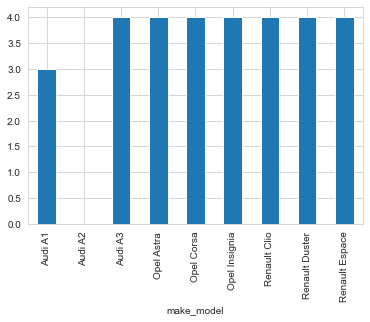

In [115]:
df.groupby('make_model')['cylinders'].median().plot(kind = "bar")

In [116]:
# It produce the same length as it is.

df.groupby('make_model')['cylinders'].transform('median')

0       3.00
1       3.00
2       3.00
3       3.00
4       3.00
        ... 
15914   4.00
15915   4.00
15916   4.00
15917   4.00
15918   4.00
Name: cylinders, Length: 15919, dtype: float64

In [117]:
df['cylinders'].fillna(df.groupby('make_model')['cylinders'].transform('median'))

0       3.00
1       4.00
2       3.00
3       3.00
4       3.00
        ... 
15914   4.00
15915   4.00
15916   4.00
15917   4.00
15918   4.00
Name: cylinders, Length: 15919, dtype: float64

In [118]:
df['cylinders'] = df['cylinders'].fillna(df.groupby('make_model')['cylinders'].transform('median'))

In [119]:
df.cylinders.value_counts(dropna=False)

4.00    12925
3.00     2963
5.00       22
6.00        3
2.00        2
8.00        2
1.00        1
nan         1
Name: cylinders, dtype: int64

In [120]:
df[df.cylinders.isnull()]

,make_model,body_type,price,vat,km,prev_owner,hp_kw,type,gear_type,displacement_cc,fuel,emission_class,gears,registration_year,body_color,paint_type,num_door,num_seat,cylinders,upholstery_type,upholstery_color,co2_emission,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,cons_comb,cons_city,cons_count
2614,Audi A2,Off-Road,28200,VAT deductible,26166,1.00,85.00,Employee's car,Manual,1598.00,Diesel,Euro 6,nan,2018.00,Grey,Metallic,5.00,5.00,nan,Cloth,Black,nan,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,0,1,0,1,1,1,0,0,0,1,1,0,0,1,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.90,5.60,4.50


In [121]:
# A2 has three cylinders, so we can fill this nan value with 3
df.cylinders[df.cylinders.isnull()] = 3
# or
# df.cylinders.fillna(3, inplace=True)

In [122]:
df.cylinders.value_counts(dropna=False)

4.00    12925
3.00     2964
5.00       22
6.00        3
2.00        2
8.00        2
1.00        1
Name: cylinders, dtype: int64

In [124]:
#df.drop("cylinders", axis = 1, inplace = True)

---

### gears

In [125]:
df.gears.value_counts(dropna = False)

6.00     5822
nan      4712
5.00     3239
7.00     1908
8.00      224
9.00        6
4.00        2
3.00        2
1.00        2
50.00       1
2.00        1
Name: gears, dtype: int64

In [126]:
df.gears = df.gears.fillna(df.groupby("make_model")["gears"].transform("median"))

In [127]:
df.gears.value_counts(dropna = False)

6.00     9361
5.00     4411
7.00     1908
8.00      224
9.00        6
4.00        2
3.00        2
1.00        2
50.00       1
2.00        1
nan         1
Name: gears, dtype: int64

In [128]:
df.gears.fillna(5, inplace = True)

In [129]:
df.gears.value_counts(dropna = False)

6.00     9361
5.00     4412
7.00     1908
8.00      224
9.00        6
4.00        2
3.00        2
1.00        2
50.00       1
2.00        1
Name: gears, dtype: int64

#### handling with outliers
- Althoug it is somehow a categorical variable, we should clear it in terms of outliers.
- If we take a look at the Renault "Espace 2018-2019 Automatic gearbox" (age of 1 year),
- We can see that there is no gear number in the AutoScout24 web page. But there is an evidence that it is 7


In [130]:
df[df.gears == 9]

,make_model,body_type,price,vat,km,prev_owner,hp_kw,type,gear_type,displacement_cc,fuel,emission_class,gears,registration_year,body_color,paint_type,num_door,num_seat,cylinders,upholstery_type,upholstery_color,co2_emission,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,cons_comb,cons_city,cons_count
15812,Renault Espace,Van,54982,VAT deductible,11,nan,165.00,New,Automatic,1798.00,Benzine,None,9.00,2019.00,White,Metallic,5.00,nan,4.00,Part leather,None,nan,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7.60,9.90,6.40
15814,Renault Espace,Van,54982,VAT deductible,11,nan,165.00,New,Automatic,1798.00,Benzine,None,9.00,2019.00,White,Metallic,5.00,nan,4.00,Part leather,None,nan,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7.60,9.90,6.40
15824,Renault Espace,Van,52711,VAT deductible,11,nan,165.00,New,Automatic,1798.00,Benzine,None,9.00,2019.00,Grey,Metallic,5.00,nan,4.00,Part leather,None,nan,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7.40,9.20,6.30
15827,Renault Espace,Van,52711,VAT deductible,11,nan,165.00,New,Automatic,1798.00,Benzine,None,9.00,2019.00,Grey,Metallic,5.00,nan,4.00,Part leather,None,nan,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7.40,9.20,6.30
15869,Renault Espace,Van,49100,VAT deductible,11,nan,146.00,New,Automatic,1997.00,Diesel,None,9.00,2019.00,White,None,5.00,nan,4.00,Part leather,None,nan,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5.30,6.20,4.70
15876,Renault

In [131]:
g_inx = df[df.gears == 9].index

In [132]:
g_inx

Int64Index([15812, 15814, 15824, 15827, 15869, 15876], dtype='int64')

In [133]:
df.gears.iloc[g_inx] = 7

In [134]:
df[df.gears == 4].index

Int64Index([15822, 15823], dtype='int64')

In [135]:
df.gears.iloc[[15822, 15823]] = 7

In [136]:
df[df.gears == 3]

,make_model,body_type,price,vat,km,prev_owner,hp_kw,type,gear_type,displacement_cc,fuel,emission_class,gears,registration_year,body_color,paint_type,num_door,num_seat,cylinders,upholstery_type,upholstery_color,co2_emission,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,cons_comb,cons_city,cons_count
15817,Renault Espace,Van,54204,VAT deductible,11,nan,146.00,New,Automatic,1997.00,Diesel,None,3.00,2019.00,White,Metallic,5.00,nan,4.00,Part leather,None,nan,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5.40,6.30,4.90
15845,Renault Espace,Van,46660,VAT deductible,11,nan,118.00,New,Automatic,1997.00,Diesel,None,3.00,2019.00,White,None,5.00,nan,4.00,Part leather,None,nan,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5.10,5.70,4.80


In [137]:
df.gears.iloc[[15817, 15845]] = 7

In [138]:
df[df.gears == 2]

,make_model,body_type,price,vat,km,prev_owner,hp_kw,type,gear_type,displacement_cc,fuel,emission_class,gears,registration_year,body_color,paint_type,num_door,num_seat,cylinders,upholstery_type,upholstery_color,co2_emission,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,cons_comb,cons_city,cons_count
9812,Opel Corsa,Sedans,9880,VAT deductible,19247,nan,51.00,Used,Manual,1229.00,Benzine,Euro 6,2.00,2018.00,Grey,Metallic,5.00,nan,4.00,Cloth,Black,nan,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.20,7.80,2.60


In [139]:
df.gears.iloc[9812] = 5

In [140]:
df[df.gears == 1]

,make_model,body_type,price,vat,km,prev_owner,hp_kw,type,gear_type,displacement_cc,fuel,emission_class,gears,registration_year,body_color,paint_type,num_door,num_seat,cylinders,upholstery_type,upholstery_color,co2_emission,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,cons_comb,cons_city,cons_count
8921,Opel Corsa,Compact,11000,VAT deductible,24000,1.00,66.00,Used,Semi-automatic,1398.00,Benzine,Euro 6d,1.00,2018.00,Blue,Metallic,5.00,5.00,4.00,Cloth,Black,112.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4.80,5.80,4.10
14375,Renault Clio,Compact,23990,None,10,nan,147.00,Demonstration,Automatic,1618.00,Benzine,None,1.00,2018.00,White,None,4.00,nan,4.00,None,None,nan,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,5.40,6.80,4.00


In [141]:
df.gears.iloc[[8921,14375]] = 5

In [142]:
df[df.gears == 50]

,make_model,body_type,price,vat,km,prev_owner,hp_kw,type,gear_type,displacement_cc,fuel,emission_class,gears,registration_year,body_color,paint_type,num_door,num_seat,cylinders,upholstery_type,upholstery_color,co2_emission,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,cons_comb,cons_city,cons_count
14495,Renault Clio,Sedans,10798,VAT deductible,10,1.00,56.00,Pre-registered,Manual,898.00,Benzine,Euro 6,50.00,2019.00,Black,Metallic,5.00,5.00,4.00,Cloth,None,118.00,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.20,6.50,4.40


In [143]:
df.gears.iloc[14495] = 5

In [144]:
df.gears.value_counts(dropna = False)

6.00    9361
5.00    4416
7.00    1918
8.00     224
Name: gears, dtype: int64

<AxesSubplot:>

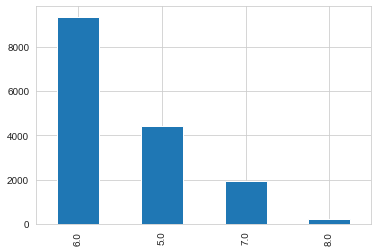

In [145]:
df.gears.value_counts(dropna = False).plot(kind = "bar")

#### It contains numerical values, we can either consider it as categorical or continuous. When we implement get_dummies(), we'll see the result.
----

### type

In [146]:
df.type.value_counts(dropna = False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: type, dtype: int64

In [147]:
df[df.type.isnull()]
# or
# df.iloc[list(df.loc[oto1.type.isnull(), 'type'].index)]

,make_model,body_type,price,vat,km,prev_owner,hp_kw,type,gear_type,displacement_cc,fuel,emission_class,gears,registration_year,body_color,paint_type,num_door,num_seat,cylinders,upholstery_type,upholstery_color,co2_emission,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,cons_comb,cons_city,cons_count
2765,Audi A3,Sedans,17900,None,115137,nan,110.00,None,Automatic,1968.00,Diesel,Euro 6,6.00,2016.00,White,None,5.00,5.00,4.00,Cloth,Other,118.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,4.50,5.30,4.10
5237,Audi A3,Sedans,25400,None,0,nan,85.00,None,Automatic,1598.00,Diesel,Euro 6,7.00,nan,Grey,None,5.00,5.00,4.00,Cloth,Other,103.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.90,4.10,3.70


In [148]:
df.type.iloc[df[df.type.isnull()].index] = "Used"
# or
# df.type.fillna("Used", inplace = True)

In [149]:
df.type.iloc[[2765, 5237]]

2765    Used
5237    Used
Name: type, dtype: object

<AxesSubplot:>

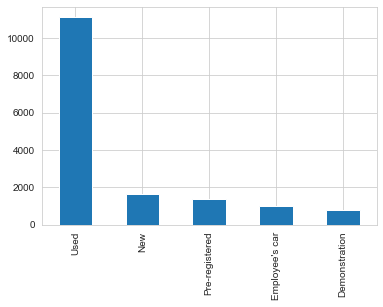

In [150]:
df.type.value_counts(dropna = False).plot(kind = "bar")

#### type variable should be considered as categorical and should be implemented get_dummies() in the end.
------

### upholstery

In [151]:
# upholstery color column is useless and must be dropped
df.drop("upholstery_color", axis = 1, inplace = True)

In [152]:
df.upholstery_type.value_counts(dropna = False)

Cloth           8423
NaN             4503
Part leather    1499
Full leather    1009
Other            368
Velour            60
alcantara         57
Name: upholstery_type, dtype: int64

In [153]:
df.upholstery_type.str.contains("leather|alcantara", case = False, regex = True).value_counts(dropna = False)

False    8851
NaN      4503
True     2565
Name: upholstery_type, dtype: int64

In [154]:
df.upholstery_type.str.contains("leather|alcantara", case = False, regex = True).value_counts().sum()

11416

In [155]:
8851 / 11416  # cloth

0.7753153468815698

In [156]:
4503 * 0.7753153468815698

3491.245007007709

* We can fill 3400 values with "cloth" and 1103 values with "leather"

In [157]:
df.upholstery_type.fillna("Cloth", limit = 1000, inplace = True)
df.upholstery_type.fillna("Leather", limit = 500, inplace = True)
df.upholstery_type.fillna("Cloth", limit = 1000, inplace = True)
df.upholstery_type.fillna("Leather", limit = 503, inplace = True)
df.upholstery_type.fillna("Cloth", limit = 1000, inplace = True)
df.upholstery_type.fillna("Leather", limit = 100, inplace = True)
df.upholstery_type.fillna("Cloth", limit = 400, inplace = True)

In [158]:
df.upholstery_type.value_counts(dropna = False)

Cloth           11823
Part leather     1499
Leather          1103
Full leather     1009
Other             368
Velour             60
alcantara          57
Name: upholstery_type, dtype: int64

In [159]:
oth_inx = df[df.upholstery_type == "Other"].index

In [160]:
df.upholstery_type.iloc[oth_inx] = np.nan

In [161]:
df.upholstery_type.value_counts(dropna = False)

Cloth           11823
Part leather     1499
Leather          1103
Full leather     1009
NaN               368
Velour             60
alcantara          57
Name: upholstery_type, dtype: int64

In [162]:
df.upholstery_type.fillna("Cloth", limit = 270, inplace = True)
df.upholstery_type.fillna("Leather", limit = 98, inplace = True)
df.upholstery_type.iloc[df[df.upholstery_type == "Velour"].index] = "Cloth"

In [163]:
df.upholstery_type.value_counts(dropna = False)

Cloth           12153
Part leather     1499
Leather          1201
Full leather     1009
alcantara          57
Name: upholstery_type, dtype: int64

In [164]:
bool_list = df.upholstery_type.str.contains("leather|alcantara", case = False, regex = True)

In [165]:
df.loc[bool_list, "upholstery_type"] = "Part/Full Leather"

In [166]:
# df.upholstery.loc[lambda x : x!= "Part/Full Leather"] = "Cloth"
df.upholstery_type.value_counts(dropna = False)

Cloth                12153
Part/Full Leather     3766
Name: upholstery_type, dtype: int64

In [167]:
df.rename(columns = {"upholstery_type" : "upholstery"}, inplace = True)

<AxesSubplot:>

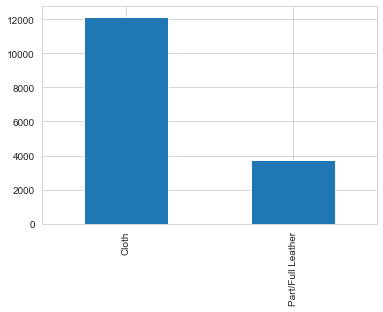

In [168]:
df.upholstery.value_counts(dropna = False).plot(kind = "bar")

* upholstery is a categorical variable and should be implemented get_dummies() in the end.

-----

### registration_year and register_age

In [169]:
df["register_age"] = 2020 - df.registration_year 

In [170]:
df.drop("registration_year", axis = 1, inplace = True)

In [171]:
df.register_age.value_counts(dropna = False)

2.00    4522
4.00    3674
3.00    3273
1.00    2853
nan     1597
Name: register_age, dtype: int64

In [172]:
df[df.register_age.isnull()]["km"].mean()

444.1346274264246

In [173]:
df[df.register_age.isnull()]["km"].median()

0.0

In [174]:
# We can conclude that NaN values can be filled with 0 year

df.register_age.fillna(df[df.register_age.isnull()]["km"].median(), inplace = True)

<AxesSubplot:>

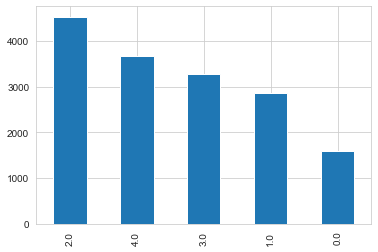

In [175]:
df.register_age.value_counts(dropna = False).plot(kind = "bar")

+ It contains numerical values, we can either consider it as categorical or continuous. When we implement get_dummies(), we'll see the result.


---

### km

In [176]:
df.km.value_counts(dropna = False)

10        1045
0         1043
1          367
5          170
50         148
          ... 
20615        1
141448       1
8329         1
84108        1
16364        1
Name: km, Length: 6689, dtype: int64

In [177]:
# different methods for getting rid of nans 
# oto1.groupby("register_age")["km"].transform("mean")
# oto1['km'] = oto1['km'].fillna(oto1.groupby('register_age')['km'].transform('mean'))

In [178]:
df[df.km == 0].register_age.value_counts(dropna = False)

0.00    857
1.00    147
2.00     38
3.00      1
Name: register_age, dtype: int64

In [179]:
df.km.describe()

count    15919.00
mean     31934.69
std      37089.14
min          0.00
25%       1557.50
50%      20400.00
75%      46898.50
max     317000.00
Name: km, dtype: float64

In [180]:
df.km.isnull().sum()

0

<AxesSubplot:xlabel='km'>

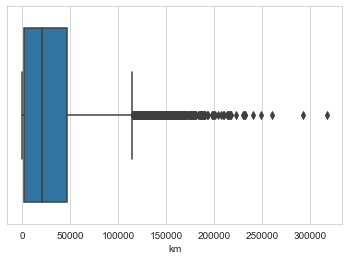

In [181]:
sns.boxplot(x = df.km)

In [182]:
Q1 = df.km.quantile(0.25)
Q3 = df.km.quantile(0.75)
IQR = Q3 - Q1
IQR

45341.0

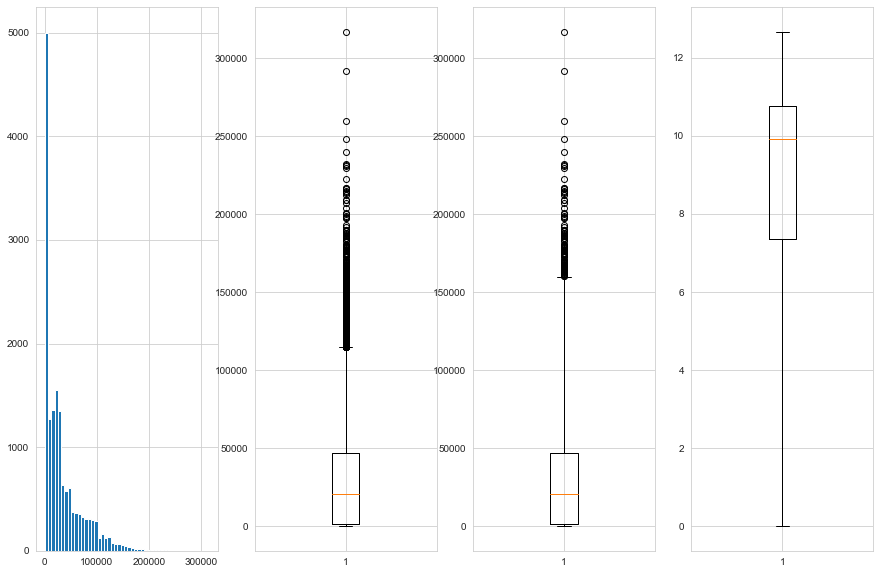

<Figure size 432x288 with 0 Axes>

In [186]:
plt.figure(figsize=(15,10))
plt.subplot(141)
plt.hist(df.km, bins = 50)

plt.subplot(142)
plt.boxplot(df.km)

#2.5 IQR
plt.subplot(143)
plt.boxplot(df.km, whis = 2.5)

#log 
plt.subplot(144)
plt.boxplot(np.log(df.km), whis = 2.5)
plt.show()
plt.tight_layout()

In [187]:
#df["km_logged"] = np.log(oto1.km)  # before ML Algorithm thsi can be used as log of km

In [188]:
df.km.sort_values(ascending = False).head()

9279     317000
3003     291800
5712     260000
6224     248000
15277    240000
Name: km, dtype: int64

+ km is a variable with a wide range of values. We can not consider the outlier values above as a real outliers. So let's keep it as it is.
----

### vat

In [189]:
df.vat.value_counts(dropna = False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

In [190]:
df.vat.fillna(method = "ffill", inplace = True)

<AxesSubplot:>

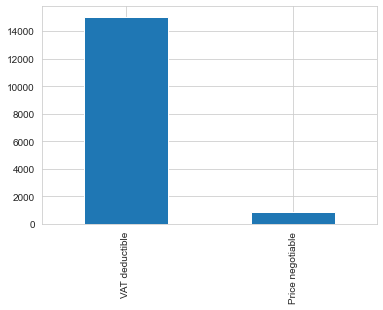

In [191]:
df.vat.value_counts(dropna = False).plot(kind = "bar")

+ vat is a categorical variable and should be implemented get_dummies()
---

### 'paint_type'

In [192]:
df.paint_type.value_counts(dropna = False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64

In [193]:
# Die Perl-Effekt-Lackierung ist eine Weiterentwicklung der Metallic-Lackierung.
df[df.paint_type == "Perl effect"].index

Int64Index([741, 7919, 8226, 8513, 9397, 13448], dtype='int64')

In [194]:
df.paint_type.iloc[[741, 7919, 8226, 8513, 9397, 13448]] = "Metallic"

In [195]:
df.paint_type.value_counts(dropna = False)

Metallic     9800
NaN          5772
Uni/basic     347
Name: paint_type, dtype: int64

In [196]:
basic_inx = df[df.paint_type == "Uni/basic"].index

In [197]:
df.paint_type.iloc[basic_inx] = "Basic"

In [198]:
df.paint_type.value_counts(dropna = False)

Metallic    9800
NaN         5772
Basic        347
Name: paint_type, dtype: int64

In [199]:
# I want to use ffill method
df.paint_type.fillna("ffill", inplace = True)

In [200]:
df.paint_type.value_counts(dropna = False)

Metallic    9800
ffill       5772
Basic        347
Name: paint_type, dtype: int64

In [201]:
df.loc[df.paint_type == "ffill", "paint_type"] = np.nan

In [202]:
df.paint_type.value_counts(dropna = False)

Metallic    9800
NaN         5772
Basic        347
Name: paint_type, dtype: int64

In [203]:
df.paint_type.fillna(method = "ffill", inplace = True)

In [205]:
df.paint_type.value_counts(dropna = False)

Metallic    15302
Basic         617
Name: paint_type, dtype: int64

+ paint_type is a categorical variable and should be implemented get_dummies()
---

### cons_comb, cons_city, cons_count

In [206]:
df.cons_comb.value_counts(dropna = False)

5.40     1098
4.00      959
4.70      760
4.40      754
5.10      747
         ... 
55.00       1
1.20        1
9.10        1
46.00       1
43.00       1
Name: cons_comb, Length: 73, dtype: int64

In [207]:
df.cons_city.value_counts(dropna = False)

5.10     1051
5.00      880
4.50      791
5.80      765
7.30      673
         ... 
19.90       1
66.00       1
10.40       1
9.70        1
10.50       1
Name: cons_city, Length: 87, dtype: int64

In [208]:
df.cons_count.value_counts(dropna = False)

3.50     1265
4.20     1206
3.70     1107
4.40     1015
3.80      936
         ... 
9.70        1
7.90        1
60.50       1
42.00       1
86.90       1
Name: cons_count, Length: 82, dtype: int64

#### Handling with outliers
- The domain (car trading) knowledge is important.
- We can see that it seems, consumption_comb values of 0, 1, 1.2 and 1.6 are meaningless.
- So, we can convert them into NaNs and then we can fill them.
- Let's go step by step

In [209]:
df.cons_comb.sort_values().head(55).unique() # outliers

array([0. , 1. , 1.2, 1.6, 3. ])

In [210]:
df.cons_comb.sort_values().tail(100).unique() # outliers

array([ 7.8,  7.9,  8. ,  8.1,  8.3,  8.6,  8.7,  9.1, 10. , 11. , 13.8,
       32. , 33. , 38. , 40. , 43. , 46. , 50. , 51. , 54. , 55. ,  nan])

In [211]:
df.cons_comb.isin([10.0, 11.0, 13.8, 32.0, 33.0, 38.0, 40.0, 43.0, 46.0, 50.0, 51.0, 54.0, 55.0, 0.0, 1.0, 1.2, 1.6]).sum()

59

In [212]:
comb_outlier_bool = df.cons_comb.isin([10.0, 11.0, 13.8, 32.0, 33.0, 38.0, 40.0, 43.0, 46.0, 50.0, 51.0, 54.0, 55.0, 0.0, 1.0, 1.2, 1.6])

In [213]:
df.loc[comb_outlier_bool, "cons_comb"] = np.nan
# or
# df.cons_comb.loc[comb_outlier_bool] = np.nan

In [214]:
# df.cons_comb.value_counts(dropna = False)

In [215]:
df.groupby("make_model")["cons_comb"].median()
# or
# df.groupby("make_model")["consumption_comb"].mean()

make_model
Audi A1          4.40
Audi A2          4.90
Audi A3          4.00
Opel Astra       4.60
Opel Corsa       5.40
Opel Insignia    5.50
Renault Clio     5.00
Renault Duster    nan
Renault Espace   4.70
Name: cons_comb, dtype: float64

In [216]:
df.cons_comb = df.cons_comb.fillna(df.groupby("make_model")["cons_comb"].transform("median"))

In [217]:
df.cons_comb.value_counts(dropna = False)

5.40    1098
4.00     969
4.40     761
4.70     761
5.10     747
3.90     733
4.50     694
3.80     642
4.30     641
5.20     635
5.60     618
5.00     552
4.80     546
3.30     465
4.20     435
4.60     427
3.70     422
4.90     393
5.30     389
5.50     384
5.90     369
4.10     342
5.70     342
6.00     331
3.50     288
6.10     258
6.20     216
3.60     195
6.30     181
5.80     164
6.80     157
6.60     148
3.40     112
6.40      75
3.00      69
7.40      66
6.70      43
6.50      43
7.10      38
nan       34
6.90      27
3.20      25
8.30      20
7.60      14
7.00      10
3.10       7
7.80       6
7.20       6
8.00       5
8.60       4
8.70       3
7.90       3
7.30       2
8.10       2
7.50       1
9.10       1
Name: cons_comb, dtype: int64

In [218]:
df.cons_comb.mean()

4.810003147623537

In [219]:
df.cons_comb = df.cons_comb.fillna(df.cons_comb.mean())

In [220]:
df.cons_comb.isnull().sum()

0

In [221]:
df.cons_comb.sort_values().tail(44)

8326    7.80
8319    7.80
11432   7.80
8321    7.80
8268    7.80
8270    7.80
11219   7.90
12620   7.90
11221   7.90
10507   8.00
10548   8.00
10571   8.00
10744   8.00
12654   8.00
3609    8.10
3608    8.10
3593    8.30
3595    8.30
3592    8.30
3590    8.30
3598    8.30
3599    8.30
3600    8.30
3601    8.30
3602    8.30
3596    8.30
3603    8.30
3587    8.30
3605    8.30
3606    8.30
3610    8.30
3648    8.30
3649    8.30
5161    8.30
10515   8.30
3604    8.30
12422   8.60
12553   8.60
12530   8.60
10789   8.60
12054   8.70
10817   8.70
12529   8.70
10771   9.10
Name: cons_comb, dtype: float64

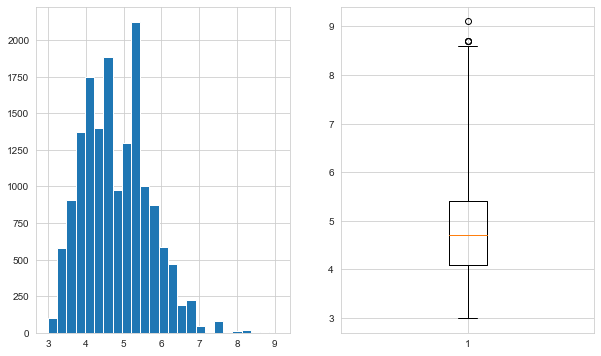

In [222]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
plt.hist(df.cons_comb, bins = 25)

plt.subplot(122)
plt.boxplot(df.cons_comb, whis = 2.5)

plt.show()

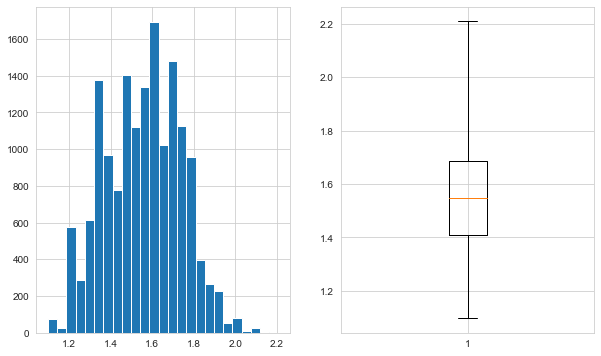

In [223]:
plt.figure(figsize = (10,6))
plt.subplot(121)
plt.hist(np.log(df.cons_comb), bins = 25)

plt.subplot(122)
plt.boxplot(np.log(df.cons_comb), whis = 2)

plt.show()

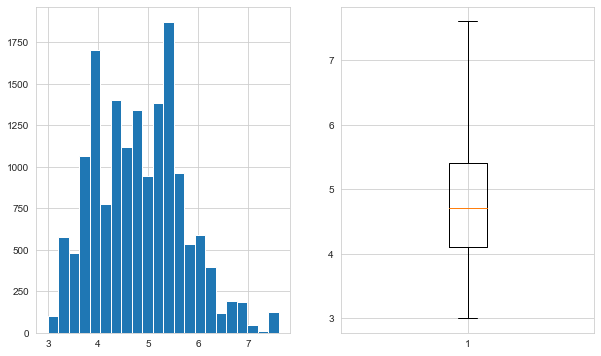

In [224]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(winsorize(df.cons_comb, (0.003)), bins=22)

plt.subplot(122)
plt.boxplot(winsorize(df.cons_comb, (0.003)), whis = 2)

plt.show()

In [225]:
# jetzt ist alles gut. The other two columns can be dropped

df.drop(["cons_city", "cons_count"], axis = 1, inplace = True)

### drive_chain
- It was dropped because of its 40% NaN values but It could be used as categorical data, therefore i am going to get it back.

In [226]:
drive = pd.read_json("scout_1.json")

In [227]:
drive.columns

Index(['make_model', 'short_description', 'body_type', 'price', 'vat', 'km',
       'registration', 'prev_owner', 'hp', 'Type', 'Non-smoking Vehicle',
       'Make', 'Model', 'First Registration', 'Body Color', 'Paint Type',
       'Upholstery', 'Nr. of Doors', 'Nr. of Seats', 'Gearing Type',
       'Displacement', 'Cylinders', 'Weight', 'Drive chain', 'Fuel',
       'Consumption', 'CO2 Emission', 'Emission Class',
       '\nComfort & Convenience\n', '\nEntertainment & Media\n', '\nExtras\n',
       '\nSafety & Security\n', 'Gears', 'Country version'],
      dtype='object')

In [228]:
df["drive_chain"] = drive['Drive chain']

In [229]:
df.drive_chain.str[0].unique()

array(['\nfront\n', None, '\n4WD\n', '\nrear\n'], dtype=object)

In [230]:
df.drive_chain = df.drive_chain.str[0].str.strip("\n")

In [231]:
# now we have a newborn drive chain
df.drive_chain.unique()

array(['front', None, '4WD', 'rear'], dtype=object)

In [232]:
df.drive_chain.value_counts(dropna = False)

front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

In [233]:
fill_most(df,"make_model", "drive_chain")

In [234]:
df.drive_chain.value_counts(dropna = False)

front    15712
4WD        203
rear         4
Name: drive_chain, dtype: int64

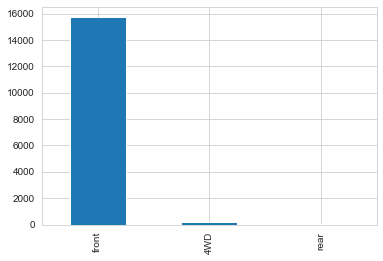

In [235]:
df.drive_chain.value_counts(dropna = False).plot(kind = "bar")
plt.show()

+ drive_chain is a categorical variable and should be implemented get_dummies()
---

### 'displacement_cc'

In [236]:
df.displacement_cc.isin([np.nan]).value_counts(dropna = False)

False    15423
True       496
Name: displacement_cc, dtype: int64

In [237]:
fill_most(df, "make_model", "displacement_cc")

In [238]:
df.displacement_cc.isnull().sum()

0

In [239]:
df.displacement_cc.describe()

count   15919.00
mean     1426.17
std       329.68
min         1.00
25%      1229.00
50%      1461.00
75%      1598.00
max     16000.00
Name: displacement_cc, dtype: float64

In [240]:
df.sort_values(by = ["displacement_cc"], ascending = False)["displacement_cc"].head(45)

10932   16000.00
7169    15898.00
10771    2967.00
3592     2480.00
3609     2480.00
3608     2480.00
3606     2480.00
3605     2480.00
3603     2480.00
3648     2480.00
3602     2480.00
3601     2480.00
3610     2480.00
3604     2480.00
3649     2480.00
3590     2480.00
3600     2480.00
3599     2480.00
3598     2480.00
3593     2480.00
3595     2480.00
3587     2480.00
3596     2480.00
11978    2000.00
11988    2000.00
2903     2000.00
12520    2000.00
12519    2000.00
12503    2000.00
12181    2000.00
12938    2000.00
12414    2000.00
12518    2000.00
11977    2000.00
11800    2000.00
12226    2000.00
12945    2000.00
12179    2000.00
12170    2000.00
12521    2000.00
11234    2000.00
10556    2000.00
13027    2000.00
13029    2000.00
13050    2000.00
Name: displacement_cc, dtype: float64

In [241]:
df.sort_values(by=['displacement_cc'])["displacement_cc"].head(55)

14315     1.00
12800     1.00
12798     1.00
12796     1.00
12484     1.00
12790     1.00
12786     1.00
12783     1.00
14327     1.00
12781     1.00
14326     1.00
14325     1.00
12769     1.00
12815     1.00
14324     1.00
12768     1.00
12750     1.00
14322     1.00
14321     1.00
12670     1.00
12604     1.00
14320     1.00
12467     1.00
12473     1.00
12554     1.00
12501     1.00
12499     1.00
14319     1.00
12823     1.00
14328     1.00
12849     1.00
13904     1.00
12848     1.00
12835     1.00
14314     1.00
14284     1.00
14198     2.00
10559     2.00
13912    54.00
10194   122.00
7812    139.00
7811    139.00
7810    139.00
7809    139.00
8128    140.00
15578   160.00
15579   160.00
15574   160.00
15575   160.00
15576   160.00
15577   160.00
13653   890.00
14702   898.00
14726   898.00
14703   898.00
Name: displacement_cc, dtype: float64

In [242]:
df.loc[df.displacement_cc.isin([1, 2, 54, 122, 139, 140, 160, 16000, 15898]), "displacement_cc"]

7169    15898.00
7809      139.00
7810      139.00
7811      139.00
7812      139.00
8128      140.00
10194     122.00
10559       2.00
10932   16000.00
12467       1.00
12473       1.00
12484       1.00
12499       1.00
12501       1.00
12554       1.00
12604       1.00
12670       1.00
12750       1.00
12768       1.00
12769       1.00
12781       1.00
12783       1.00
12786       1.00
12790       1.00
12796       1.00
12798       1.00
12800       1.00
12815       1.00
12823       1.00
12835       1.00
12848       1.00
12849       1.00
13904       1.00
13912      54.00
14198       2.00
14284       1.00
14314       1.00
14315       1.00
14319       1.00
14320       1.00
14321       1.00
14322       1.00
14324       1.00
14325       1.00
14326       1.00
14327       1.00
14328       1.00
15574     160.00
15575     160.00
15576     160.00
15577     160.00
15578     160.00
15579     160.00
Name: displacement_cc, dtype: float64

In [243]:
df.loc[df.displacement_cc.isin([1, 2, 54, 122, 139, 140, 160, 16000, 15898]), "displacement_cc"] = np.nan

In [244]:
fill_most(df, "make_model", "displacement_cc")

In [245]:
df.displacement_cc.value_counts(dropna = False).index

Float64Index([1598.0,  999.0, 1398.0, 1399.0, 1461.0, 1229.0, 1956.0, 1490.0,
              1422.0, 1197.0,  898.0, 1395.0, 1968.0, 1149.0, 1618.0, 1798.0,
              1498.0, 1600.0, 1248.0, 1997.0, 1364.0, 1400.0,  998.0, 1500.0,
              2000.0, 1000.0, 1998.0, 2480.0, 1984.0, 1200.0,  899.0, 1397.0,
               929.0, 1499.0,  997.0,  900.0, 1596.0, 1396.0, 1599.0, 1199.0,
              1589.0, 1495.0,  995.0, 1300.0, 1496.0, 1584.0,  996.0,  973.0,
              1533.0, 1239.0, 1368.0, 1333.0, 1369.0, 1568.0, 1686.0, 1856.0,
              1896.0, 1100.0, 1696.0, 1198.0, 1800.0, 1195.0, 2967.0, 1390.0,
               890.0, 1995.0, 1350.0, 1580.0],
             dtype='float64')

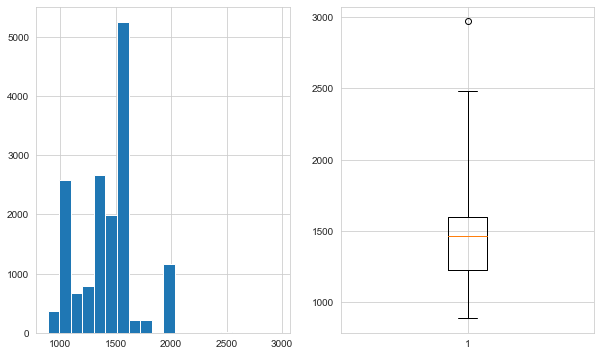

In [246]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
plt.hist(df.displacement_cc, bins = 20)

plt.subplot(122)
plt.boxplot(df.displacement_cc, whis = 2.5)

plt.show()

+ There is no problem in terms of outliers
---

### emission_class

In [247]:
df.emission_class.unique()

array(['Euro 6', None, 'Euro 5', 'Euro 6d-TEMP', 'Euro 6c', 'Euro 4',
       'Euro 6d'], dtype=object)

In [248]:
df.emission_class.isin(['Euro 6', 'Euro 6d-TEMP', 'Euro 6c', 'Euro 6d']).sum()

12173

In [249]:
emiss_list_bool = df.emission_class.isin(['Euro 6', 'Euro 6d-TEMP', 'Euro 6c', 'Euro 6d'])

In [250]:
df.loc[emiss_list_bool, "emission_class"] = 'Euro 6'

In [251]:
df.emission_class.value_counts(dropna = False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: emission_class, dtype: int64

In [252]:
df.emission_class.value_counts().sum()

12291

In [253]:
12173 / 12291

0.9903994792937922

In [254]:
3628 * 0.9903994792937922

3593.169310877878

In [255]:
78 / 12291

0.006346106907493288

In [256]:
3628 * 0.006346106907493288

23.023675860385648

In [257]:
40 / 12291

0.0032544137987145067

In [258]:
3628 * 0.0032544137987145067

11.80701326173623

In [259]:
df.emission_class.fillna("Euro 6", limit = 1000, inplace = True)
df.emission_class.fillna("Euro 5", limit = 10, inplace = True)
df.emission_class.fillna("Euro 4", limit = 5, inplace = True)
df.emission_class.fillna("Euro 6", limit = 1000, inplace = True)
df.emission_class.fillna("Euro 5", limit = 10, inplace = True)
df.emission_class.fillna("Euro 4", limit = 6, inplace = True)
df.emission_class.fillna("Euro 6", limit = 1000, inplace = True)
df.emission_class.fillna("Euro 5", limit = 3, inplace = True)
df.emission_class.fillna("Euro 6", limit = 594, inplace = True)

In [260]:
df.emission_class.value_counts(dropna = False)

Euro 6    15767
Euro 5      101
Euro 4       51
Name: emission_class, dtype: int64

+ emission_class is a categorical variable and should be implemented get_dummies()
---

### 'num_door'

In [261]:
df.num_door.value_counts(dropna = False)

5.00    11575
4.00     3079
3.00      832
2.00      219
nan       212
7.00        1
1.00        1
Name: num_door, dtype: int64

In [262]:
fill_most(df, "make_model", "num_door")

In [263]:
df[df['num_door'] == 7.0]

,make_model,body_type,price,vat,km,prev_owner,hp_kw,type,gear_type,displacement_cc,fuel,emission_class,gears,body_color,paint_type,num_door,num_seat,cylinders,upholstery,co2_emission,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,cons_comb,register_age,drive_chain
15202,Renault Espace,Van,21600,Price negotiable,78000,nan,118.00,Used,Automatic,1598.00,Diesel,Euro 6,6.00,Brown,Metallic,7.00,nan,4.00,Part/Full Leather,120.00,1,0,1,1,0,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,1,0,1,0,1,1,1,1,0,1,1,0,0,0,1,1,0,1,0,1,1,1,1,0,0,0,1,1,1,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4.60,4.00,front


In [264]:
df.num_door.iloc[15202] = 5

In [265]:
df[df['num_door'] == 1.0]

,make_model,body_type,price,vat,km,prev_owner,hp_kw,type,gear_type,displacement_cc,fuel,emission_class,gears,body_color,paint_type,num_door,num_seat,cylinders,upholstery,co2_emission,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,cons_comb,register_age,drive_chain
13782,Renault Clio,Compact,8500,VAT deductible,41493,nan,55.00,Used,Manual,1461.00,Diesel,Euro 6,5.00,White,Metallic,1.00,nan,4.00,Cloth,nan,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.30,4.00,front


In [266]:
df.num_door.iloc[13782] = 5

<AxesSubplot:>

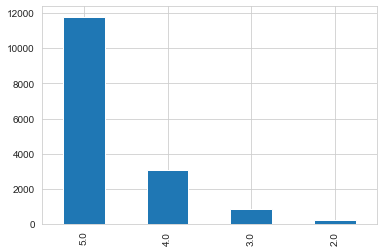

In [267]:
df.num_door.value_counts(dropna = False).plot(kind = "bar")

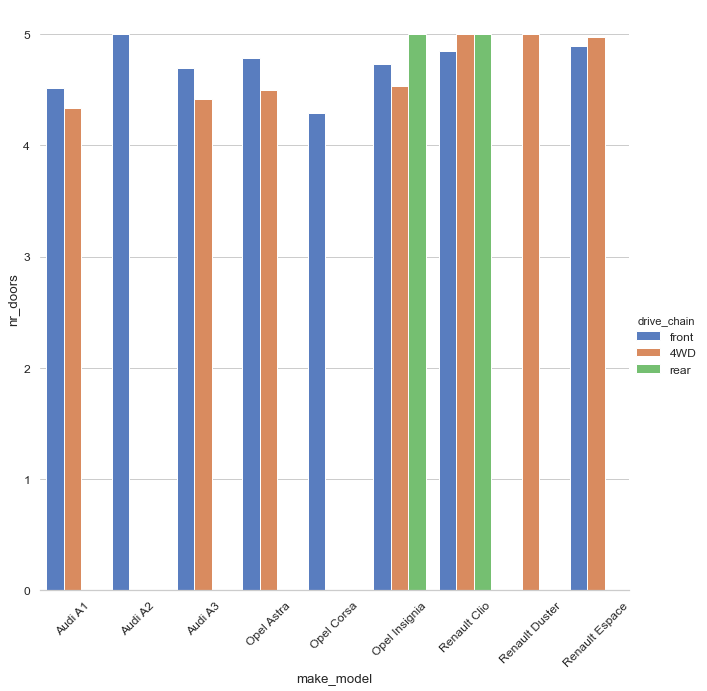

In [268]:
sns.set(style = "whitegrid", font_scale = 1.1)

g = sns.catplot(y = "num_door", x = "make_model", hue = "drive_chain", data = df,
               height = 9, kind = "bar", palette = "muted", ci = False)

g.despine(left = True)
g.set_ylabels("nr_doors")
plt.xticks(rotation = 45)

plt.show()

### num_seat

In [269]:
df.num_seat.value_counts(dropna = False)

5.00    13336
4.00     1125
nan       977
7.00      362
2.00      116
6.00        2
3.00        1
Name: num_seat, dtype: int64

In [270]:
fill_most(df, "make_model", "num_seat")

In [271]:
df[df.num_seat == 6]

,make_model,body_type,price,vat,km,prev_owner,hp_kw,type,gear_type,displacement_cc,fuel,emission_class,gears,body_color,paint_type,num_door,num_seat,cylinders,upholstery,co2_emission,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,cons_comb,register_age,drive_chain
582,Audi A1,Compact,13500,VAT deductible,100000,1.00,70.00,Used,Manual,1000.00,Benzine,Euro 6,5.00,White,Metallic,5.00,6.00,4.00,Cloth,nan,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.40,3.00,front
15890,Renault Espace,Station wagon,42490,VAT deductible,0,nan,147.00,New,Automatic,1997.00,Diesel,Euro 6,6.00,Black,Metallic,5.00,6.00,4.00,Cloth,168.00,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5.70,0.00,front


In [272]:
df.num_seat.iloc[[582, 15890]] = 5

In [273]:
df[df.num_seat == 3]

,make_model,body_type,price,vat,km,prev_owner,hp_kw,type,gear_type,displacement_cc,fuel,emission_class,gears,body_color,paint_type,num_door,num_seat,cylinders,upholstery,co2_emission,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,cons_comb,register_age,drive_chain
1636,Audi A1,Compact,23090,VAT deductible,9821,1.00,141.00,Used,Automatic,1798.00,Benzine,Euro 6,7.00,Black,Metallic,2.00,3.00,4.00,Part/Full Leather,134.00,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,5.80,2.00,front


In [274]:
df.num_seat.iloc[1636] = 5

In [275]:
df.num_seat.value_counts(dropna = False)

5.00    14316
4.00     1125
7.00      362
2.00      116
Name: num_seat, dtype: int64

<AxesSubplot:>

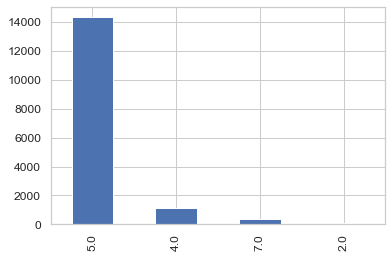

In [276]:
df.num_seat.value_counts(dropna = False).plot(kind = "bar")

### fuel

In [277]:
df.fuel.value_counts(dropna = False)

Benzine                        8548
Diesel                         7300
LPG/CNG                          64
Others                            5
Electric                          1
Others (Particulate Filter)       1
Name: fuel, dtype: int64

In [278]:
df[df.fuel == "Others (Particulate Filter)"]

,make_model,body_type,price,vat,km,prev_owner,hp_kw,type,gear_type,displacement_cc,fuel,emission_class,gears,body_color,paint_type,num_door,num_seat,cylinders,upholstery,co2_emission,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,cons_comb,register_age,drive_chain
4003,Audi A3,Sedans,19490,VAT deductible,49267,1.00,85.00,Used,Automatic,1598.00,Others (Particulate Filter),Euro 6,7.00,Red,Metallic,5.00,5.00,4.00,Cloth,nan,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.00,3.00,front


In [279]:
df.fuel.iloc[4003] = "Benzine"

In [280]:
df[df.fuel == "Others"].index

Int64Index([819, 2885, 10374, 11677, 14500], dtype='int64')

In [281]:
df[df.fuel == "Electric"].index

Int64Index([13397], dtype='int64')

In [282]:
df.fuel.iloc[[819, 2885, 10374, 11677, 14500, 13397]] = "LPG/CNG"

In [283]:
df.fuel.value_counts(dropna = False)

Benzine    8549
Diesel     7300
LPG/CNG      70
Name: fuel, dtype: int64

In [284]:
df.loc[df.fuel == "LPG/CNG", "fuel"] = "LPG/CNG/Electric"

In [285]:
df.fuel.value_counts(dropna = False)

Benzine             8549
Diesel              7300
LPG/CNG/Electric      70
Name: fuel, dtype: int64

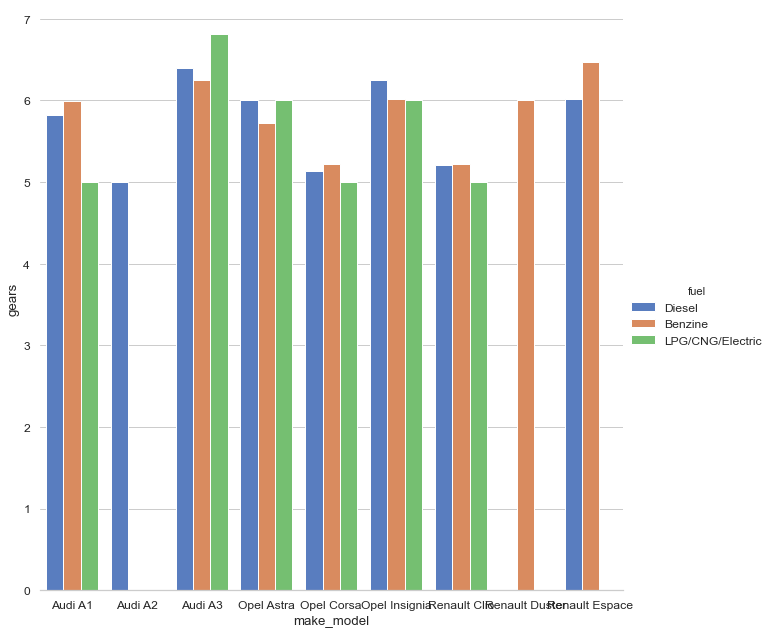

In [286]:
sns.set(style="whitegrid", font_scale = 1.1)

g = sns.catplot(y="gears", x="make_model", hue="fuel", data=df,
                height=9, kind="bar", palette="muted", ci = False)
g.despine(left=True)
g.set_ylabels("gears")

In [288]:
df.isnull().sum()*100/df.shape[0]

make_model         0.00
body_type          0.00
price              0.00
vat                0.00
km                 0.00
                   ... 
ex_voice control   0.00
ex_winter tyres    0.00
cons_comb          0.00
register_age       0.00
drive_chain        0.00
Length: 117, dtype: float64

### price (do not touch this)

In [289]:
df.price.isnull().sum()

0

In [290]:
df.price.describe()

count   15919.00
mean    18019.90
std      7386.17
min        13.00
25%     12850.00
50%     16900.00
75%     21900.00
max     74600.00
Name: price, dtype: float64

In [291]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
IQR

9050.0

In [292]:
# Tukey's outlier
df.price[((df.price < (Q1 - 1.5 * IQR)) | (df.price > (Q3 + 1.5 * IQR)))]

713      37900
732      35900
3587     64900
3589     39959
3590     62900
         ...  
15914    39950
15915    39885
15916    39875
15917    39700
15918    40999
Name: price, Length: 479, dtype: int64

In [293]:
out_inx = df.price[((df.price < (Q1 - 1.5 * IQR)) | (df.price > (Q3 + 1.5 * IQR)))].index

In [294]:
df.iloc[out_inx].loc[:, ("make_model", "body_type", "type", "km", "register_age", "price")]

,make_model,body_type,type,km,register_age,price
713,Audi A1,Sedans,Used,7000,1.00,37900
732,Audi A1,Sedans,Pre-registered,200,1.00,35900
3587,Audi A3,Sedans,Used,35000,2.00,64900
3589,Audi A3,Compact,New,7,2.00,39959
3590,Audi A3,Sedans,Used,700,1.00,62900
...,...,...,...,...,...,...
15914,Renault Espace,Van,New,0,0.00,39950
15915,Renault Espace,Van,Used,9900,1.00,39885
15916,Renault Espace,Van,Pre-registered,15,1.00,39875
15917,Renault Espace,Van,Pre-registered,10,1.00,39700


In [295]:
price_outlier = df.iloc[out_inx].loc[:, ("make_model", "body_type", "type", "km", "register_age", "price")]

In [296]:
price_outlier

,make_model,body_type,type,km,register_age,price
713,Audi A1,Sedans,Used,7000,1.00,37900
732,Audi A1,Sedans,Pre-registered,200,1.00,35900
3587,Audi A3,Sedans,Used,35000,2.00,64900
3589,Audi A3,Compact,New,7,2.00,39959
3590,Audi A3,Sedans,Used,700,1.00,62900
...,...,...,...,...,...,...
15914,Renault Espace,Van,New,0,0.00,39950
15915,Renault Espace,Van,Used,9900,1.00,39885
15916,Renault Espace,Van,Pre-registered,15,1.00,39875
15917,Renault Espace,Van,Pre-registered,10,1.00,39700


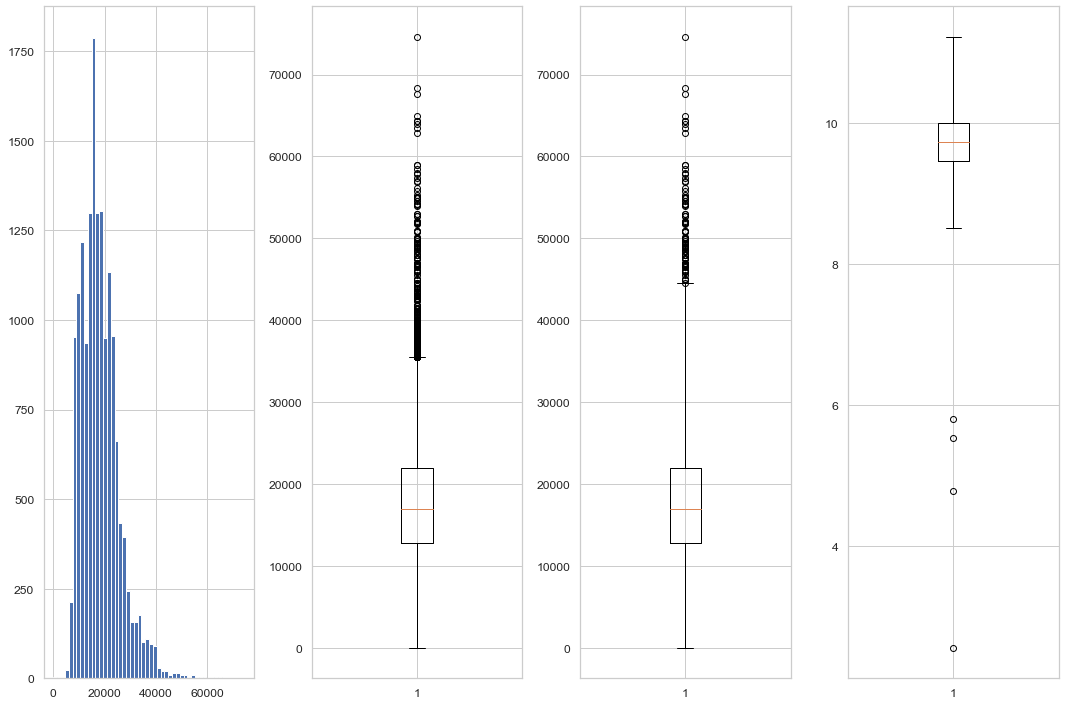

In [297]:
plt.figure(figsize=(15,10))
plt.subplot(141)
plt.hist(df.price, bins = 50)

plt.subplot(142)
plt.boxplot(df.price)

#2.5 IQR
plt.subplot(143)
plt.boxplot(df.price, whis = 2.5)

#log 
plt.subplot(144)
plt.boxplot(np.log(df.price), whis = 2.5)

plt.tight_layout()
plt.show()

In [298]:
df.price.sort_values().head(33)

8594       13
8828      120
6066      255
8829      331
8827     4950
8825     4990
8826     5250
8824     5300
13770    5445
8823     5450
8822     5490
8820     5499
3235     5555
8821     5600
13763    5700
13762    5800
13760    5850
13759    5890
8818     5890
13761    5900
13757    5900
13758    5900
13756    5938
8819     5950
8602     5970
8600     5970
8601     5970
8597     5990
13755    6000
13754    6000
5712     6000
8599     6100
8598     6200
Name: price, dtype: int64

In [299]:
df.drop(index = [8594, 8828, 6066, 8829], axis = 0, inplace = True)

In [300]:
df.shape

(15915, 117)

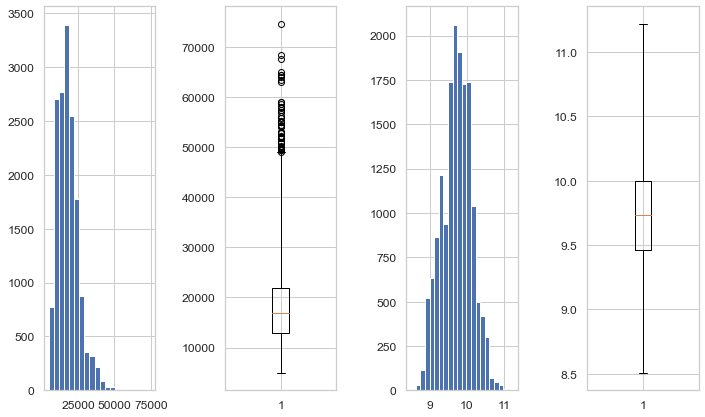

In [301]:
plt.figure(figsize=(10,6))
plt.subplot(141)
plt.hist(df.price, bins=20)

plt.subplot(142)
plt.boxplot(df.price, whis=3)

plt.subplot(143)
plt.hist(np.log(df.price), bins=22)

plt.subplot(144)
plt.boxplot(np.log(df.price), whis=2.3)

plt.tight_layout()
plt.show()

### prev_owner

In [302]:
df.prev_owner.isnull().sum()

6824

In [303]:
df.prev_owner.unique()

array([ 2., nan,  1.,  3.,  4.])

In [304]:
df.prev_owner.value_counts(dropna = False)

1.00    8294
nan     6824
2.00     778
3.00      17
4.00       2
Name: prev_owner, dtype: int64

In [305]:
df[df.prev_owner.isnull()]

,make_model,body_type,price,vat,km,prev_owner,hp_kw,type,gear_type,displacement_cc,fuel,emission_class,gears,body_color,paint_type,num_door,num_seat,cylinders,upholstery,co2_emission,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,cons_comb,register_age,drive_chain
1,Audi A1,Sedans,14500,Price negotiable,80000,nan,141.00,Used,Automatic,1798.00,Benzine,Euro 6,7.00,Red,Metallic,3.00,4.00,4.00,Cloth,129.00,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,5.60,3.00,front
9,Audi A1,Sedans,17990,VAT deductible,16103,nan,70.00,Used,Automatic,999.00,Benzine,Euro 6,7.00,White,Metallic,5.00,4.00,3.00,Cloth,nan,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.40,3.00,front
10,Audi A1,Sedans,18500,VAT deductible,11300,nan,85.00,Used,Automatic,1598.00,Diesel,Euro 6,7.00,Black,Metallic,3.00,4.00,4.00,Cloth,105.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4.00,2.00,front
13,Audi A1,Sedans,18399,VAT deductible,45764,nan,112.00,Used,Automatic,1395.00,Benzine,Euro 6,6.00,Grey,Metallic,3.00,4.00,3.00,Cloth,nan,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,4.40,4.00,front
16,Audi A1,Sedans,18900,VAT deductible,9752,nan,85.00,Used,Automatic,1598.00,Diesel,Euro 6,5.00,Blue,Metallic,5.00,4.00,4.00,Cloth,92.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,3.50,2.00,front
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [306]:
df.groupby("register_age")["prev_owner"].transform("median")

0       1.00
1       1.00
2       1.00
3       1.00
4       1.00
        ... 
15914   1.00
15915   1.00
15916   1.00
15917   1.00
15918   1.00
Name: prev_owner, Length: 15915, dtype: float64

In [307]:
df.prev_owner.fillna(df.groupby("register_age")["prev_owner"].transform("median"), inplace = True)

In [308]:
df.prev_owner.value_counts(dropna = False)

1.00    15118
2.00      778
3.00       17
4.00        2
Name: prev_owner, dtype: int64

<AxesSubplot:>

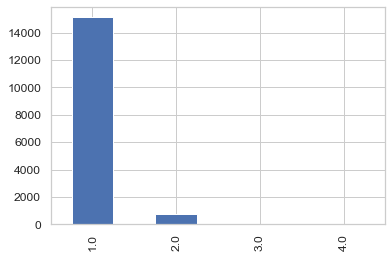

In [309]:
df.prev_owner.value_counts(dropna = False).plot(kind = "bar")

In [310]:
list(df.columns)

['make_model',
 'body_type',
 'price',
 'vat',
 'km',
 'prev_owner',
 'hp_kw',
 'type',
 'gear_type',
 'displacement_cc',
 'fuel',
 'emission_class',
 'gears',
 'body_color',
 'paint_type',
 'num_door',
 'num_seat',
 'cylinders',
 'upholstery',
 'co2_emission',
 'cc_air conditioning',
 'cc_air suspension',
 'cc_armrest',
 'cc_automatic climate control',
 'cc_auxiliary heating',
 'cc_cruise control',
 'cc_electric starter',
 'cc_electric tailgate',
 'cc_electrical side mirrors',
 'cc_electrically adjustable seats',
 'cc_electrically heated windshield',
 'cc_heads-up display',
 'cc_heated steering wheel',
 'cc_hill holder',
 'cc_keyless central door lock',
 'cc_leather seats',
 'cc_leather steering wheel',
 'cc_light sensor',
 'cc_lumbar support',
 'cc_massage seats',
 'cc_multi-function steering wheel',
 'cc_navigation system',
 'cc_panorama roof',
 'cc_park distance control',
 'cc_parking assist system camera',
 'cc_parking assist system self-steering',
 'cc_parking assist system senso

### hp_kW

In [311]:
df.hp_kw.value_counts(dropna = False)

85.00     2542
66.00     2119
81.00     1402
100.00    1307
110.00    1112
          ... 
75.00        1
115.00       1
137.00       1
132.00       1
84.00        1
Name: hp_kw, Length: 81, dtype: int64

In [312]:
list(df.hp_kw.sort_values().tail(80))

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [313]:
df.loc[df.hp_kw.isin([1,4,9]), "hp_kw"] = np.nan

In [314]:
df.hp_kw.isnull().sum()

110

In [315]:
df.shape

(15915, 117)

In [316]:
df.groupby("make_model")["hp_kw"].mean()

make_model
Audi A1           76.67
Audi A2           85.00
Audi A3           90.22
Opel Astra        92.91
Opel Corsa        60.43
Opel Insignia    114.53
Renault Clio      71.41
Renault Duster    77.15
Renault Espace   130.65
Name: hp_kw, dtype: float64

In [317]:
df.groupby("make_model")["hp_kw"].median()

make_model
Audi A1           70.00
Audi A2           85.00
Audi A3           85.00
Opel Astra        92.00
Opel Corsa        66.00
Opel Insignia    121.00
Renault Clio      56.00
Renault Duster    77.00
Renault Espace   118.00
Name: hp_kw, dtype: float64

In [318]:
df.groupby("make_model")["hp_kw"].transform("mean")

0        76.67
1        76.67
2        76.67
3        76.67
4        76.67
         ...  
15914   130.65
15915   130.65
15916   130.65
15917   130.65
15918   130.65
Name: hp_kw, Length: 15915, dtype: float64

In [319]:
df.hp_kw.fillna(df.groupby("make_model")["hp_kw"].transform("mean"), inplace = True)

In [320]:
df.hp_kw.isnull().sum()

0

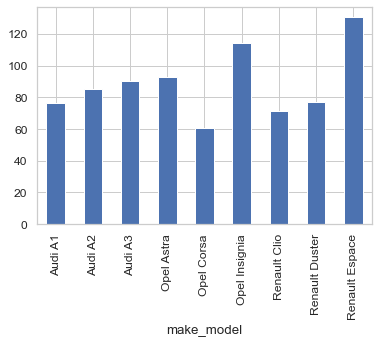

In [321]:
df.groupby("make_model")["hp_kw"].mean().plot(kind = "bar")
plt.show()

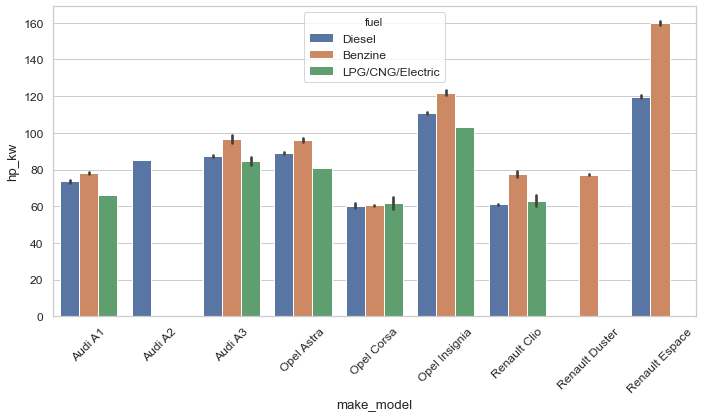

In [322]:
plt.figure(figsize = (10,6))
sns.barplot(data = df, x = "make_model", y = "hp_kw", hue = "fuel")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

<AxesSubplot:>

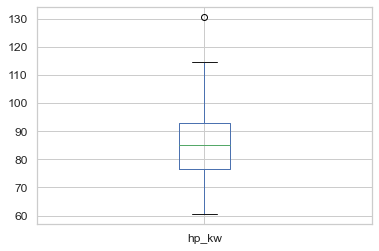

In [323]:
df.groupby("make_model")["hp_kw"].mean().plot(kind = "box")

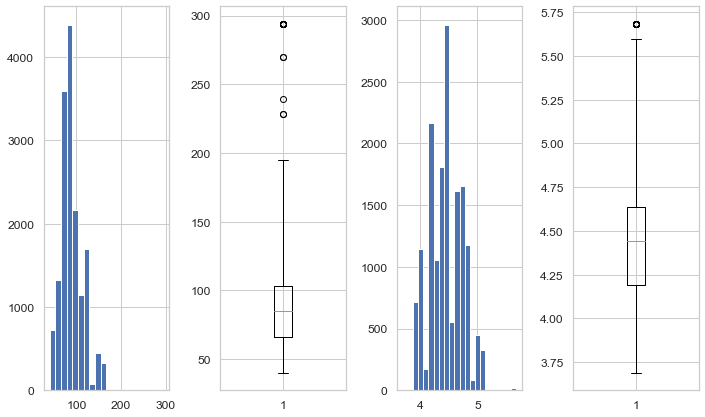

In [324]:
plt.figure(figsize=(10,6))
plt.subplot(141)
plt.hist(df.hp_kw, bins=20)

plt.subplot(142)
plt.boxplot(df.hp_kw, whis=3)

plt.subplot(143)
plt.hist(np.log(df.hp_kw), bins=22)

plt.subplot(144)
plt.boxplot(np.log(df.hp_kw), whis=2.3)

plt.tight_layout()
plt.show()

In [325]:
df[df.hp_kw == 294]

,make_model,body_type,price,vat,km,prev_owner,hp_kw,type,gear_type,displacement_cc,fuel,emission_class,gears,body_color,paint_type,num_door,num_seat,cylinders,upholstery,co2_emission,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,cons_comb,register_age,drive_chain
3587,Audi A3,Sedans,64900,VAT deductible,35000,1.00,294.00,Used,Semi-automatic,2480.00,Benzine,Euro 6,7.00,Grey,Metallic,5.00,5.00,5.00,Part/Full Leather,189.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.30,2.00,front
3590,Audi A3,Sedans,62900,VAT deductible,700,1.00,294.00,Used,Semi-automatic,2480.00,Benzine,Euro 6,7.00,Grey,Metallic,5.00,5.00,5.00,Part/Full Leather,194.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.30,1.00,front
3592,Audi A3,Sedans,56900,VAT deductible,5200,1.00,294.00,Used,Semi-automatic,2480.00,Benzine,Euro 6,7.00,Grey,Metallic,5.00,5.00,5.00,Part/Full Leather,189.00,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0,0,0,0,0,1,0,0,1,1,1,1,0,0,1,0,8.30,2.00,4WD
3593,Audi A3,Sedans,58500,VAT deductible,10000,1.00,294.00,Used,Semi-automatic,2480.00,Benzine,Euro 6,7.00,White,Metallic,5.00,5.00,5.00,Part/Full Leather,189.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.30,2.00,front
3595,Audi A3,Station wagon,63900,VAT deductible,10,1.00,294.00,Used,Semi-automatic,2480.00,Benzine,Euro 6,7.00,Black,Metallic,5.00,5.00,5.00,Part/Full Leather,189.00,1,0,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,0,1,1,1,1,0,0,1,0,8.30,1.00,front
3596,Audi A3,Sedans,57400,

### gear_type

In [326]:
df.gear_type.value_counts(dropna = False)

Manual            8149
Automatic         7297
Semi-automatic     469
Name: gear_type, dtype: int64

### body_color

In [327]:
df.body_color.value_counts(dropna = False)

Black     3745
Grey      3504
White     3405
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Name: body_color, dtype: int64

In [328]:
df.body_color.fillna(method = "bfill", inplace = True)

In [329]:
df.body_color.value_counts(dropna = False)

Black     3888
Grey      3637
White     3539
Silver    1687
Blue      1524
Red        989
Brown      299
Green      163
Beige      108
Yellow      53
Violet      18
Bronze       7
Orange       3
Name: body_color, dtype: int64

### co2_emission

In [330]:
#  The passenger car standards are 95 g/km of CO2
#  The light-commercial vehicle standards are 147 g/km of CO2
#  https://theicct.org/sites/default/files/publications/ICCTupdate_EU-95gram_jan2014.pdf

In [331]:
df.co2_emission.value_counts().sort_index().head(20)

12.00      4
13.00      1
14.00      2
36.00      3
45.00      1
51.00      1
60.00      1
80.00      1
82.00     25
84.00      2
85.00    275
87.00      6
88.00     15
89.00     19
90.00     35
91.00     31
92.00    198
93.00     66
94.00     37
95.00    161
Name: co2_emission, dtype: int64

In [332]:
df.co2_emission.value_counts().sort_index().tail(20)

175.00     8
177.00     1
180.00     1
181.00     1
183.00     1
184.00     1
186.00    30
187.00    26
188.00     7
189.00    19
190.00     1
191.00     2
193.00     1
194.00     3
197.00     4
199.00     2
239.00     1
253.00     1
331.00     1
990.00     1
Name: co2_emission, dtype: int64

In [333]:
df[df.co2_emission == 60]

,make_model,body_type,price,vat,km,prev_owner,hp_kw,type,gear_type,displacement_cc,fuel,emission_class,gears,body_color,paint_type,num_door,num_seat,cylinders,upholstery,co2_emission,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,cons_comb,register_age,drive_chain
4089,Audi A3,Sedans,19500,VAT deductible,23644,1.00,85.00,Used,Manual,1598.00,Diesel,Euro 6,6.00,Blue,Metallic,5.00,5.00,4.00,Cloth,60.00,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.00,2.00,front


In [334]:
df.co2_emission.sort_values().head(13).index

Int64Index([6579, 8542, 6578, 5818, 12343, 11888, 8110, 3612, 3617, 3615,
            12547, 9798, 4089],
           dtype='int64')

In [335]:
df.iloc[[6579, 8542, 6578, 5818, 12343, 11888, 8110, 3612, 3617, 3615,
            12547, 9798, 4089]]

,make_model,body_type,price,vat,km,prev_owner,hp_kw,type,gear_type,displacement_cc,fuel,emission_class,gears,body_color,paint_type,num_door,num_seat,cylinders,upholstery,co2_emission,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,cons_comb,register_age,drive_chain
6580,Opel Astra,Sedans,17850,VAT deductible,1145,2.00,110.00,Demonstration,Automatic,1399.00,Benzine,Euro 6,6.00,Brown,Metallic,4.00,5.00,4.00,Cloth,127.00,1,0,1,1,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.50,2.00,front
8543,Opel Corsa,Sedans,11889,VAT deductible,22729,1.00,66.00,Used,Automatic,1398.00,Benzine,Euro 6,5.00,White,Metallic,5.00,5.00,4.00,Cloth,110.00,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.70,2.00,front
6579,Opel Astra,Station wagon,17850,VAT deductible,29900,1.00,110.00,Used,Automatic,1399.00,Benzine,Euro 6,6.00,Green,Metallic,5.00,5.00,4.00,Cloth,12.00,1,0,1,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,5.10,2.00,front
5818,Opel Astra,Sedans,14990,VAT deductible,85182,1.00,110.00,Used,Automatic,1399.00,Benzine,Euro 6,6.00,Brown,Metallic,5.00,5.00,4.00,Cloth,12.00,1,0,1,1,0,1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,1,0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,1,0,1,0,1,1,1,0,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.10,4.00,front
12347,Opel Insignia,Sedans,19980,VAT deductible,29947,1.00,125.00,Used,Manual,1956.00,Diesel,Euro 6,6.00,Grey,Metallic,4.00,5.00,4.00,Part/Full Leather,136.00,1,0,1,1,0,1,0,0,1,0,0,0,1,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,5.20,2.00,front
11892,Opel Insignia,Station wagon,23500,VAT deductible,29600,1.00,122

In [336]:
df[df.co2_emission == 990]

,make_model,body_type,price,vat,km,prev_owner,hp_kw,type,gear_type,displacement_cc,fuel,emission_class,gears,body_color,paint_type,num_door,num_seat,cylinders,upholstery,co2_emission,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,cons_comb,register_age,drive_chain
4556,Audi A3,Sedans,23500,VAT deductible,27815,1.00,81.00,Used,Automatic,1598.00,Diesel,Euro 6,6.00,Grey,Metallic,5.00,5.00,4.00,Cloth,990.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.00,2.00,front


In [337]:
df.co2_emission.iloc[[6579, 8542, 6578, 5818, 12343, 11888, 8110, 3612, 3617, 3615,
            12547, 9798, 4089, 4556]] 

6580    127.00
8543    110.00
6579     12.00
5818     12.00
12347   136.00
11892   141.00
8111       nan
3612     36.00
3617     36.00
3615     36.00
12551   118.00
9802    124.00
4089     60.00
4556    990.00
Name: co2_emission, dtype: float64

In [338]:
df.co2_emission.iloc[[6579, 8542, 6578, 5818, 12343, 11888, 8110, 3612, 3617, 3615,
            12547, 9798, 4089, 4556]] = np.nan

In [339]:
df.co2_emission.sort_values().tail(13)

15831   nan
15833   nan
15845   nan
15854   nan
15857   nan
15864   nan
15869   nan
15876   nan
15883   nan
15903   nan
15906   nan
15908   nan
15909   nan
Name: co2_emission, dtype: float64

In [341]:
df.shape

(15915, 117)

In [344]:
df.groupby("make_model").co2_emission.transform("median")

0       102.00
1       102.00
2       102.00
3       102.00
4       102.00
         ...  
15914   123.00
15915   123.00
15916   123.00
15917   123.00
15918   123.00
Name: co2_emission, Length: 15915, dtype: float64

In [346]:
df.co2_emission.fillna(df.groupby("make_model").co2_emission.transform("median"), inplace = True)

In [348]:
df.co2_emission.value_counts(dropna =False).sort_values()

253.00      1
171.00      1
160.00      1
80.00       1
nan         1
         ... 
137.00    638
107.00    715
120.00    740
119.00    805
97.00     847
Name: co2_emission, Length: 115, dtype: int64

In [350]:
df[df.make_model == "Audi A2"]

,make_model,body_type,price,vat,km,prev_owner,hp_kw,type,gear_type,displacement_cc,fuel,emission_class,gears,body_color,paint_type,num_door,num_seat,cylinders,upholstery,co2_emission,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,cons_comb,register_age,drive_chain
2614,Audi A2,Off-Road,28200,VAT deductible,26166,1.00,85.00,Employee's car,Manual,1598.00,Diesel,Euro 6,5.00,Grey,Metallic,5.00,5.00,3.00,Cloth,nan,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,0,1,0,1,1,1,0,0,0,1,1,0,0,1,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.90,2.00,front


In [352]:
df.co2_emission.iloc[2614] = 142.0

In [353]:
df[df.make_model == "Audi A2"]

,make_model,body_type,price,vat,km,prev_owner,hp_kw,type,gear_type,displacement_cc,fuel,emission_class,gears,body_color,paint_type,num_door,num_seat,cylinders,upholstery,co2_emission,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,cons_comb,register_age,drive_chain
2614,Audi A2,Off-Road,28200,VAT deductible,26166,1.00,85.00,Employee's car,Manual,1598.00,Diesel,Euro 6,5.00,Grey,Metallic,5.00,5.00,3.00,Cloth,142.00,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,0,1,0,1,1,1,0,0,0,1,1,0,0,1,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.90,2.00,front


In [354]:
df.isnull().sum()*100/df.shape[0]

make_model         0.00
body_type          0.00
price              0.00
vat                0.00
km                 0.00
                   ... 
ex_voice control   0.00
ex_winter tyres    0.00
cons_comb          0.00
register_age       0.00
drive_chain        0.00
Length: 117, dtype: float64

In [355]:
df.isnull().sum()

make_model          0
body_type           0
price               0
vat                 0
km                  0
                   ..
ex_voice control    0
ex_winter tyres     0
cons_comb           0
register_age        0
drive_chain         0
Length: 117, dtype: int64

### It seems, the process of "handling with missing values" is done.

In [358]:
miss_val = []

[miss_val.append(i) for i in df.columns if any(df[i].isnull())]

miss_val

[]

### Re-inspect all features & Re-apply EDA

#### Correlation with Heatmap

In [360]:
list(df.columns)

['make_model',
 'body_type',
 'price',
 'vat',
 'km',
 'prev_owner',
 'hp_kw',
 'type',
 'gear_type',
 'displacement_cc',
 'fuel',
 'emission_class',
 'gears',
 'body_color',
 'paint_type',
 'num_door',
 'num_seat',
 'cylinders',
 'upholstery',
 'co2_emission',
 'cc_air conditioning',
 'cc_air suspension',
 'cc_armrest',
 'cc_automatic climate control',
 'cc_auxiliary heating',
 'cc_cruise control',
 'cc_electric starter',
 'cc_electric tailgate',
 'cc_electrical side mirrors',
 'cc_electrically adjustable seats',
 'cc_electrically heated windshield',
 'cc_heads-up display',
 'cc_heated steering wheel',
 'cc_hill holder',
 'cc_keyless central door lock',
 'cc_leather seats',
 'cc_leather steering wheel',
 'cc_light sensor',
 'cc_lumbar support',
 'cc_massage seats',
 'cc_multi-function steering wheel',
 'cc_navigation system',
 'cc_panorama roof',
 'cc_park distance control',
 'cc_parking assist system camera',
 'cc_parking assist system self-steering',
 'cc_parking assist system senso

In [361]:
numeric_col = "price,km,gears,co2_emission,prev_owner,cons_comb,displacement_cc,register_age,hp_kw".split(",")

In [362]:
oto_corr = df[numeric_col]

In [363]:
oto_corr

,price,km,gears,co2_emission,prev_owner,cons_comb,displacement_cc,register_age,hp_kw
0,15770,56013,6.00,99.00,2.00,3.80,1422.00,4.00,66.00
1,14500,80000,7.00,129.00,1.00,5.60,1798.00,3.00,141.00
2,14640,83450,6.00,99.00,1.00,3.80,1598.00,4.00,85.00
3,14500,73000,6.00,99.00,1.00,3.80,1422.00,4.00,66.00
4,16790,16200,6.00,109.00,1.00,4.10,1422.00,4.00,66.00
...,...,...,...,...,...,...,...,...,...
15914,39950,0,6.00,139.00,1.00,5.30,1997.00,0.00,147.00
15915,39885,9900,7.00,168.00,1.00,7.40,1798.00,1.00,165.00
15916,39875,15,6.00,139.00,1.00,5.30,1997.00,1.00,146.00
15917,39700,10,6.00,139.00,1.00,5.30,1997.00,1.00,147.00


<AxesSubplot:>

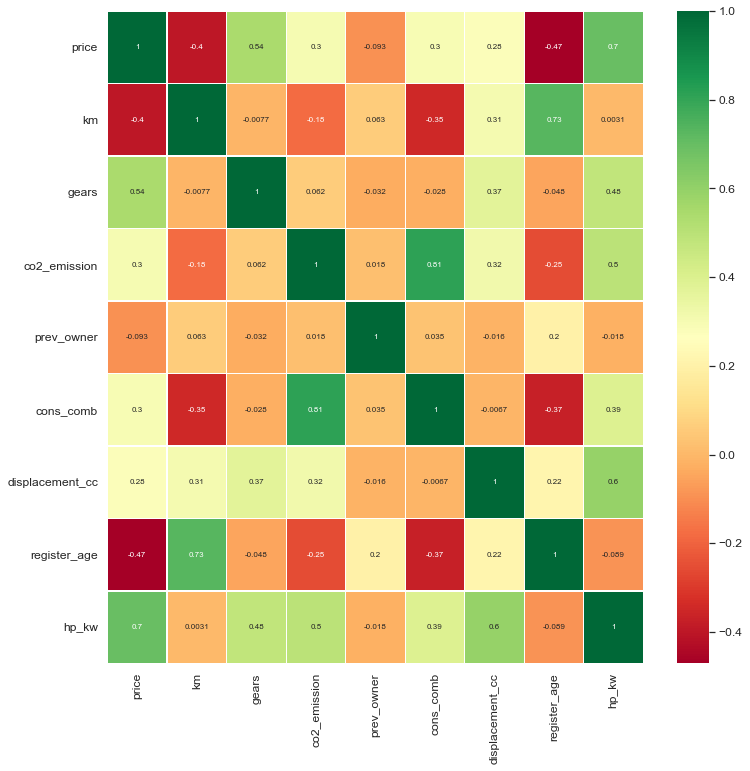

In [364]:
plt.figure(figsize = (12,12))
sns.heatmap(oto_corr.corr(), annot = True, cmap="RdYlGn", linewidths=0.2, annot_kws = {"size": 8})

+ We can get from the heatmap that; "register_age" & "km", "displacement_cc" & "hp_kw", "price" & "hp" are correlated.
+ But anyways these columns are considered to have an effect on predicting price.

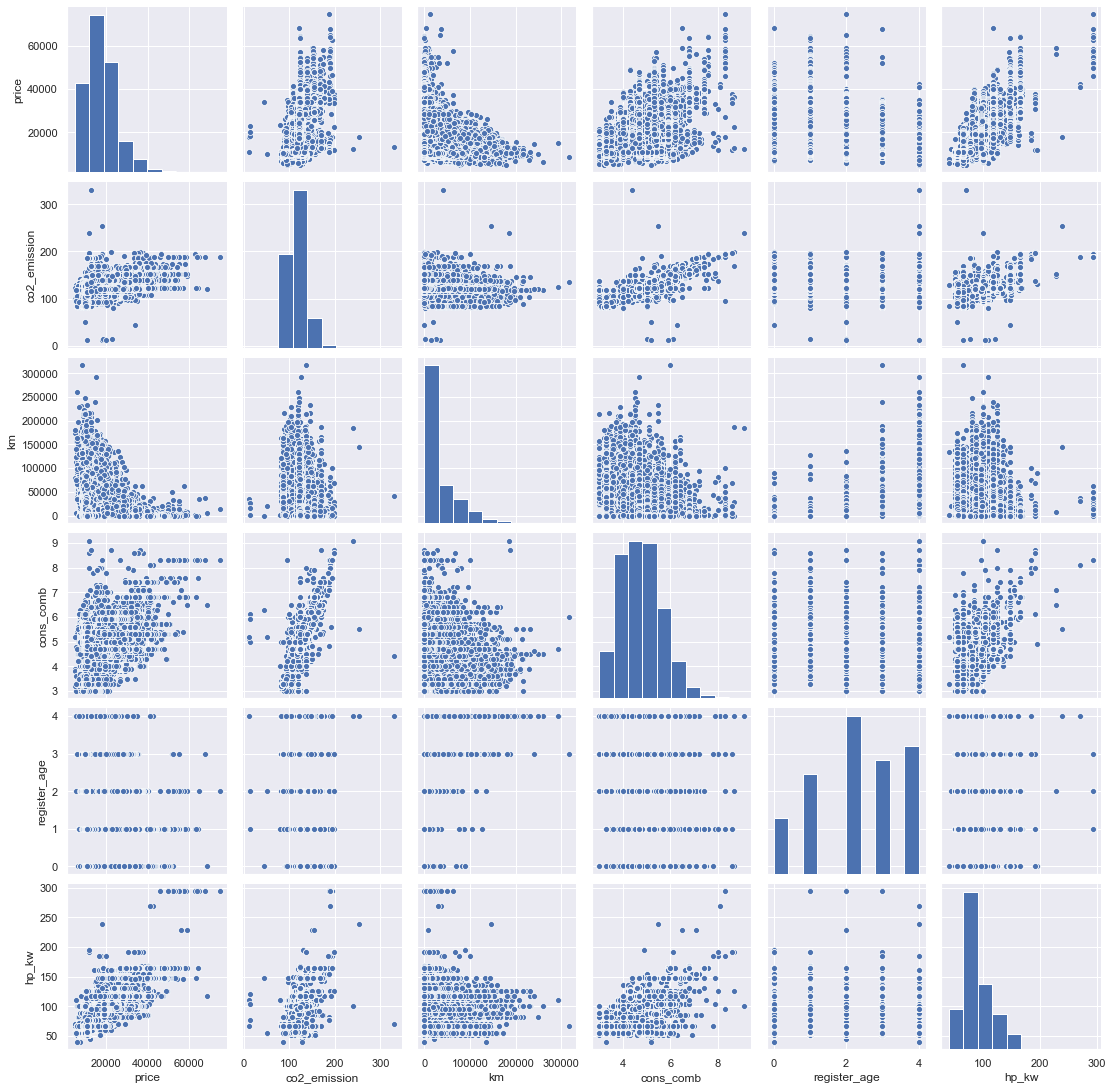

In [366]:
sns.set()

cols=["price", "co2_emission", "km", "cons_comb", "register_age", "hp_kw"]

sns.pairplot(df[cols], size = 2.5)

plt.show()

In [367]:
df2 = pd.get_dummies(df)

In [368]:
df2.shape

(15915, 159)

In [373]:
pd.set_option('display.expand_frame_repr', True)

In [374]:
df2.head()

,price,km,prev_owner,hp_kw,displacement_cc,gears,num_door,num_seat,cylinders,co2_emission,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,cons_comb,register_age,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used,gear_type_Automatic,gear_type_Manual,gear_type_Semi-automatic,fuel_Benzine,fuel_Diesel,fuel_LPG/CNG/Electric,emission_class_Euro 4,emission_class_Euro 5,emission_class_Euro 6,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,paint_type_Basic,paint_type_Metallic,upholstery_Cloth,upholstery_Part/Full Leather,drive_chain_4WD,drive_chain_front,drive_chain_rear
0,15770,56013,2.00,66.00,1422.00,6.00,5.00,5.00,3.00,99.00,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.80,4.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
1,14500,80000,1.00,141.00,1798.00,7.00,3.00,4.00,4.00,129.00,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,5.60,3.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0
2,14640,83450,1.00,85.00,1598.00,6.00,4.00,4.00,3.00,99.00,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0

In [371]:
df2.to_csv("scout_cleaned.csv")

In [372]:
df2.to_json("scout_cleaned.json")

### End of this Project. Next step will be :
+ Runing the Regression ML Model